# python libraries

In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import pandas
import seaborn as sns 
from sklearn import preprocessing
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from nltk.stem.isri import ISRIStemmer
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Arabic_tweets_positive dataset 

In [2]:
cols = ['class','tweet_text']
train_pos = pd.read_csv(r'C:\Users\PC\Desktop\AI\NLP\tpos.tsv',sep='\t', error_bad_lines = False ,header=None, names=cols)
train_neg = pd.read_csv(r'C:\Users\PC\Desktop\AI\NLP\tneg.tsv',sep='\t', error_bad_lines = False ,header=None, names=cols)
test_pos =pd.read_csv(r'C:\Users\PC\Desktop\AI\NLP\tspos.tsv',sep='\t', error_bad_lines = False ,header=None, names=cols)
test_neg =pd.read_csv(r'C:\Users\PC\Desktop\AI\NLP\tsneg.tsv',sep='\t', error_bad_lines = False ,header=None, names=cols)

# Explore dataset


In [3]:
train_pos.head()

,class,tweet_text
0,pos,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...
1,pos,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
2,pos,من الخير نفسه 💛
3,pos,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...
4,pos,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...


In [4]:
train_neg.head()

,class,tweet_text
0,neg,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...
1,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
2,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
3,neg,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...
4,neg,الدودو جايه تكمل علي 💔


In [5]:
train=pd.concat([train_pos,train_neg]).reset_index( drop=True)

In [6]:
test=pd.concat([test_pos,test_neg]).reset_index( drop=True)

In [7]:
train.describe()

,class,tweet_text
count,45275,45275
unique,2,29449
top,pos,بمناسبة فوز الهلال .. 💙 سحب على آيفون XR📱 رتوي...
freq,22761,349


In [8]:
test.describe()

,class,tweet_text
count,11520,11520
unique,2,8817
top,neg,بمناسبة فوز الهلال .. 💙 سحب على آيفون XR📱 رتوي...
freq,5768,108


* I notice that the data has a lot of duplicates, so I want to drop these duplicated values

In [9]:
train=train.drop_duplicates(subset=['tweet_text']).reset_index(drop=True)
train.describe()

,class,tweet_text
count,29449,29449
unique,2,29449
top,neg,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...
freq,14990,1


In [10]:
test=test.drop_duplicates(subset=['tweet_text']).reset_index(drop=True)
test.describe()

,class,tweet_text
count,8817,8817
unique,2,8817
top,neg,#الهلال_الاهلي فوز هلالي مهم الحمد لله 💙 زوران...
freq,4431,1


# Dataset preprocessing


## Checking null values

In [11]:
train.isna().sum()

class         0
tweet_text    0
dtype: int64

In [12]:
test.isna().sum()

class         0
tweet_text    0
dtype: int64

## Cleaning tweet text

In [13]:
def remove_punct(text):
    t1=re.sub("[^ أ-ي گ]"," ",text)
    t2=re.sub('\s+'," ",t1)
    t3=re.sub('\s[أ-ي]\s','',t2)

    return t3

In [14]:
train["tweet_text"]=train["tweet_text"].apply(remove_punct)

In [15]:
test['tweet_text']=test['tweet_text'].apply(remove_punct)

# Normalization

In [17]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [18]:
train["tweet_text"]=train["tweet_text"].apply(normalize_arabic)
test['tweet_text']=test['tweet_text'].apply(normalize_arabic)

In [19]:
train["tweet_text"][494]

'هدف عبدالفتاح صحيح ده وقتك يانصراوي اضرب الاهلاوي يصيح النصراوي اضرب النصراوي يصيح الاهلاوي الهلال الاهلي'

## Getting Tokenize the tweet text

In [20]:
from nltk.tokenize import word_tokenize

In [21]:
train_tokens=pd.DataFrame(train["tweet_text"].apply(lambda x: word_tokenize(x)))
test_tokens=pd.DataFrame(test["tweet_text"].apply(lambda x: word_tokenize(x)))

In [22]:
train_tokens["tweet_text"][0]

['نحن',
 'الذين',
 'يتحول',
 'كل',
 'ما',
 'نود',
 'ان',
 'نقوله',
 'الي',
 'دعا',
 'لله',
 'لا',
 'تبحثوا',
 'فينا',
 'عن',
 'قوه',
 'اننا',
 'مكسورون',
 'القوه',
 'التي']

## Stop words 

In [23]:
nltk.download('stopwords')
stopwords_list = stopwords.words('arabic')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
listToStr = ' '.join([str(elem) for elem in stopwords_list]) 

In [25]:
listToStr

'إذ إذا إذما إذن أف أقل أكثر ألا إلا التي الذي الذين اللاتي اللائي اللتان اللتيا اللتين اللذان اللذين اللواتي إلى إليك إليكم إليكما إليكن أم أما أما إما أن إن إنا أنا أنت أنتم أنتما أنتن إنما إنه أنى أنى آه آها أو أولاء أولئك أوه آي أي أيها إي أين أين أينما إيه بخ بس بعد بعض بك بكم بكم بكما بكن بل بلى بما بماذا بمن بنا به بها بهم بهما بهن بي بين بيد تلك تلكم تلكما ته تي تين تينك ثم ثمة حاشا حبذا حتى حيث حيثما حين خلا دون ذا ذات ذاك ذان ذانك ذلك ذلكم ذلكما ذلكن ذه ذو ذوا ذواتا ذواتي ذي ذين ذينك ريث سوف سوى شتان عدا عسى عل على عليك عليه عما عن عند غير فإذا فإن فلا فمن في فيم فيما فيه فيها قد كأن كأنما كأي كأين كذا كذلك كل كلا كلاهما كلتا كلما كليكما كليهما كم كم كما كي كيت كيف كيفما لا لاسيما لدى لست لستم لستما لستن لسن لسنا لعل لك لكم لكما لكن لكنما لكي لكيلا لم لما لن لنا له لها لهم لهما لهن لو لولا لوما لي لئن ليت ليس ليسا ليست ليستا ليسوا ما ماذا متى مذ مع مما ممن من منه منها منذ مه مهما نحن نحو نعم ها هاتان هاته هاتي هاتين هاك هاهنا هذا هذان هذه هذي هذين هكذا هل هلا هم هما هن هنا هن

## stop words normalization

In [26]:
text = re.sub("[إأآا]", "ا", listToStr)
text = re.sub("ى", "ي", text)
text = re.sub("ة", "ه", text)
stop_words=text.split(" ")

In [27]:
stop_words

['اذ',
 'اذا',
 'اذما',
 'اذن',
 'اف',
 'اقل',
 'اكثر',
 'الا',
 'الا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'الي',
 'اليك',
 'اليكم',
 'اليكما',
 'اليكن',
 'ام',
 'اما',
 'اما',
 'اما',
 'ان',
 'ان',
 'انا',
 'انا',
 'انت',
 'انتم',
 'انتما',
 'انتن',
 'انما',
 'انه',
 'اني',
 'اني',
 'اه',
 'اها',
 'او',
 'اولاء',
 'اولئك',
 'اوه',
 'اي',
 'اي',
 'ايها',
 'اي',
 'اين',
 'اين',
 'اينما',
 'ايه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلي',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمه',
 'حاشا',
 'حبذا',
 'حتي',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوي',
 'شتان',
 'عدا',
 'عسي',
 'عل'

# Text Information

In [28]:
train_tokens['tweet_text']=train_tokens['tweet_text'].apply(lambda x: [token for token in x if token not in stop_words] )

In [29]:
test_tokens["tweet_text"]=test_tokens["tweet_text"].apply(lambda x: [token for token in x if token not in stop_words] )

In [30]:
all_words_train = [token for doc in train_tokens['tweet_text'] for token in doc]
sentence_lengths_train = [len(doc) for doc in train_tokens['tweet_text']]

VOCAB_train = sorted(list(set(all_words_train)))

print(f"{len(all_words_train)} words total on train, with a vocabulary size of {len(VOCAB_train)}" )
print(f"Max sentence length on train is {max(sentence_lengths_train)}" ,end='\n\n')

237512 words total on train, with a vocabulary size of 64319
Max sentence length on train is 976



## top 10 words in train

In [31]:
counter_train = Counter(all_words_train)
counter_train.most_common(20)

[('الله', 3990),
 ('اللهم', 1554),
 ('اللي', 1223),
 ('والله', 1058),
 ('شي', 918),
 ('الخير', 888),
 ('يارب', 851),
 ('يوم', 768),
 ('الهلال', 606),
 ('مش', 563),
 ('اليوم', 533),
 ('النصر', 497),
 ('وش', 471),
 ('الاتحاد', 464),
 ('الناس', 454),
 ('مو', 445),
 ('عشان', 442),
 ('وانا', 424),
 ('خير', 422),
 ('الاهلي', 421)]

## Count of each target class

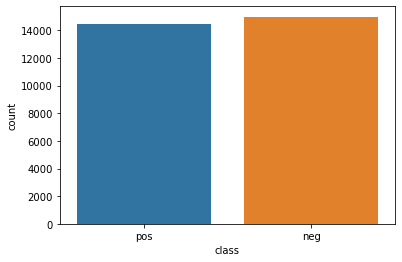

In [32]:
sns.countplot(data= train, x = "class")
plt.show()

# Features Extraction from tweets text with TFIDF 

In [33]:
word_vectorizer = TfidfVectorizer(stop_words=stop_words)

In [34]:
x_train=word_vectorizer.fit_transform(train['tweet_text'])
x_train=x_train.astype(np.float32).toarray()

In [35]:
x_train.shape

(29449, 64319)

In [36]:
y_train=train['class']

In [37]:
x_test=word_vectorizer.transform(test['tweet_text'])
x_test=x_test.astype(np.float32).toarray()

In [38]:
x_test.shape

(8817, 64319)

In [39]:
y_test=test['class']

## Encoding "class" column 

In [40]:
encoder= preprocessing.LabelEncoder()

In [41]:
y_train=encoder.fit_transform(y_train)
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [42]:
y_test=encoder.transform(y_test)
y_test

array([1, 1, 1, ..., 0, 0, 0])

# Trainig Naive Bayes Algorithm

In [46]:
nb=GaussianNB()
nb= nb.fit(x_train , y_train)
nb

GaussianNB()

#### Accuracy

In [47]:
print(nb.score(x_test, y_test))

0.7093115572190087


#### Precision

In [48]:
y_pred = nb.predict(x_test)

In [49]:
precision_score(y_test, y_pred)

0.7415849456665783

#### F1

In [50]:
f1_score(y_test, y_pred)

0.6858683662213506

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73      4431
           1       0.74      0.64      0.69      4386

    accuracy                           0.71      8817
   macro avg       0.71      0.71      0.71      8817
weighted avg       0.71      0.71      0.71      8817



In [53]:
cm=confusion_matrix(y_test, y_pred)

Text(33.0, 0.5, 'Actual values')

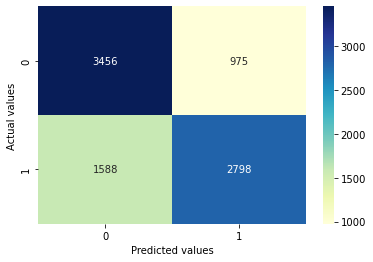

In [54]:
cm=sns.heatmap(cm,annot=True,fmt='0',cmap='YlGnBu')
cm.set_xlabel("Predicted values")
cm.set_ylabel("Actual values")